# Loading your own data - TF2.X

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [5]:
cv2.__version__

'4.1.2'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
directory = '/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/pics/'

classes = ["dog", "cat"]

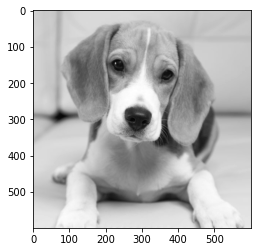

In [11]:
for i in classes:
    path = os.path.join(directory,i)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray') 
        plt.show()

        break
    break 

In [12]:
print(img_array)

[[208 208 208 ... 193 193 193]
 [208 208 208 ... 193 193 193]
 [208 208 208 ... 193 193 193]
 ...
 [228 228 228 ... 228 228 228]
 [227 228 228 ... 228 228 228]
 [227 228 228 ... 228 228 228]]


In [13]:
print(img_array.shape)

(600, 600)


## Standardization of the data:

In [14]:
img_size = 100

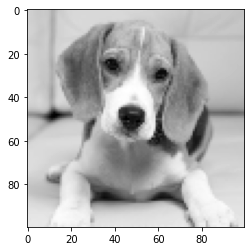

In [15]:
new_img = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_img, cmap='gray')
plt.show()

## Creating Training Data:

In [16]:
training_data = []

def create_training_data():
    for category in classes:

        path = os.path.join(directory,category)  # create path to dogs and cats
        class_num = classes.index(category)  # 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_img = cv2.resize(img_array, (img_size, img_size))  # resize to normalize data size
                training_data.append([new_img, class_num])  # add this to our training_data
            except Exception as e: 
                pass

In [17]:
create_training_data()

In [18]:
print(len(training_data))

1


In [19]:
import random
random.shuffle(training_data)

In [20]:
X = []
y = []

In [21]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [22]:
print(X[0].reshape(-1, img_size, img_size, 1))

[[[[208]
   [206]
   [204]
   ...
   [194]
   [193]
   [193]]

  [[208]
   [205]
   [204]
   ...
   [192]
   [192]
   [192]]

  [[208]
   [205]
   [204]
   ...
   [192]
   [192]
   [192]]

  ...

  [[228]
   [228]
   [229]
   ...
   [227]
   [227]
   [227]]

  [[229]
   [229]
   [228]
   ...
   [227]
   [227]
   [227]]

  [[229]
   [228]
   [227]
   ...
   [227]
   [229]
   [228]]]]


In [23]:
y

[0]

In [24]:
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [25]:
X.shape

(1, 100, 100, 1)

## Saving the data:

In [27]:
import pickle

In [28]:
pickle_out = open("/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/data/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [29]:
pickle_out = open("/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/data/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Load the data:

In [30]:
pickle_in = open("/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/data/X.pickle","rb")
X = pickle.load(pickle_in)

In [31]:
pickle_in = open("/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/data/y.pickle","rb")
y = pickle.load(pickle_in)

In [32]:
X.shape

(1, 100, 100, 1)